In [2]:
from keras.datasets import mnist
from matplotlib import pyplot
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import load_model
from keras.callbacks import EarlyStopping


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = np.expand_dims(train_X, axis=-1)  # Add a channel dimension for ResNet50
train_X = np.repeat(train_X, 3, axis=-1)  # Repeat the single channel to simulate 3 channels
train_X = np.pad(train_X, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')  # Resize to 224x224
train_y = to_categorical(train_y, 10)

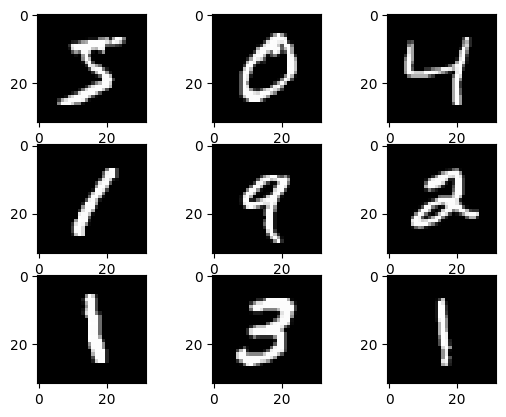

In [6]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [8]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(10, activation='softmax'))

model.layers[0].trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 120)               123000    
                                                                 
Total params: 30,005,240
Trainable params: 6,417,528
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=1,
    restore_best_weights=True
)
model.fit(x = train_X, y= train_y, epochs=10, callbacks=[early_stopping])

Epoch 1/10
131/521 [======>.......................] - ETA: 27:32 - loss: 4.8350 - accuracy: 0.0076

KeyboardInterrupt: 

In [ ]:
model.save('NN/model_mnist_renet50.h5')

In [17]:
model_final = load_model('NN/model_renet50.h5')
test_X = np.expand_dims(test_X, axis=-1)  # Add a channel dimension for ResNet50
test_X = np.repeat(test_X, 3, axis=-1)  # Repeat the single channel to simulate 3 channels
test_X = np.pad(test_X, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')  # Resize to 224x224
result = model_final.evaluate(test_X, to_categorical(test_y, 10))
print(result)

313/313 [==============================] - 56s 167ms/step - loss: 0.1846 - accuracy: 0.9479
[0.18462827801704407, 0.9478999972343445]


In [18]:
pred = model_final.predict(test_X[9:10])

1/1 [==============================] - 5s 5s/step


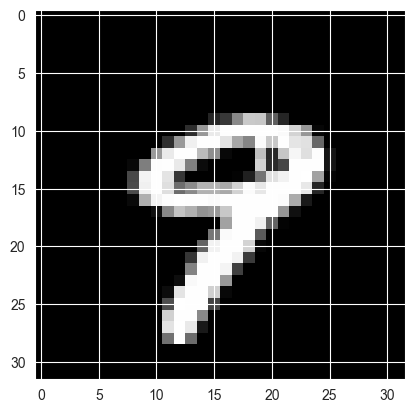

In [19]:
pyplot.imshow(test_X[9], cmap=pyplot.get_cmap('gray'))